# **Multi Linear Regression(MLR) Assignment**

# **Assignment 5(a)**

# ***1. 50 Startups DataSet(50_Startups.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
#importing dataset
df=pd.read_csv('/content/50_Startups.csv')

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# **Exploratory Data Analysis**

In [4]:
df.shape

(50, 5)

In [5]:
#checking missing values
df.isna().sum()  #no null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
#checking duplicates
df.duplicated().sum()

0

In [7]:
df[df.duplicated()].sum()  #no duplicates

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

In [8]:
#checking datatypes
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [12]:
#rename
df=df.rename(columns={'R&D Spend':'RD','Administration':'Adm','Marketing Spend':'MS','State':'St','Profit':'Profit'})

In [13]:
#copy
df_copy=df.copy()

In [14]:
df.head()

,RD,Adm,MS,St,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
df.tail()

,RD,Adm,MS,St,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# **Correlation**

In [16]:
#correlation
df.corr()

,RD,Adm,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Adm,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# **Visualization**

# **Heatmap**

<Axes: >

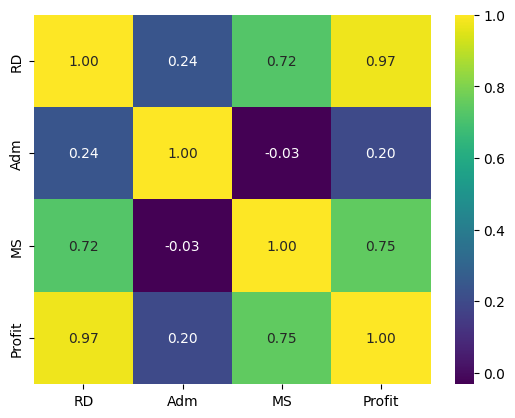

In [17]:
#heatmap
sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt='.2f',linecolor='black')

# **PairPlot**

<Figure size 1000x1000 with 0 Axes>

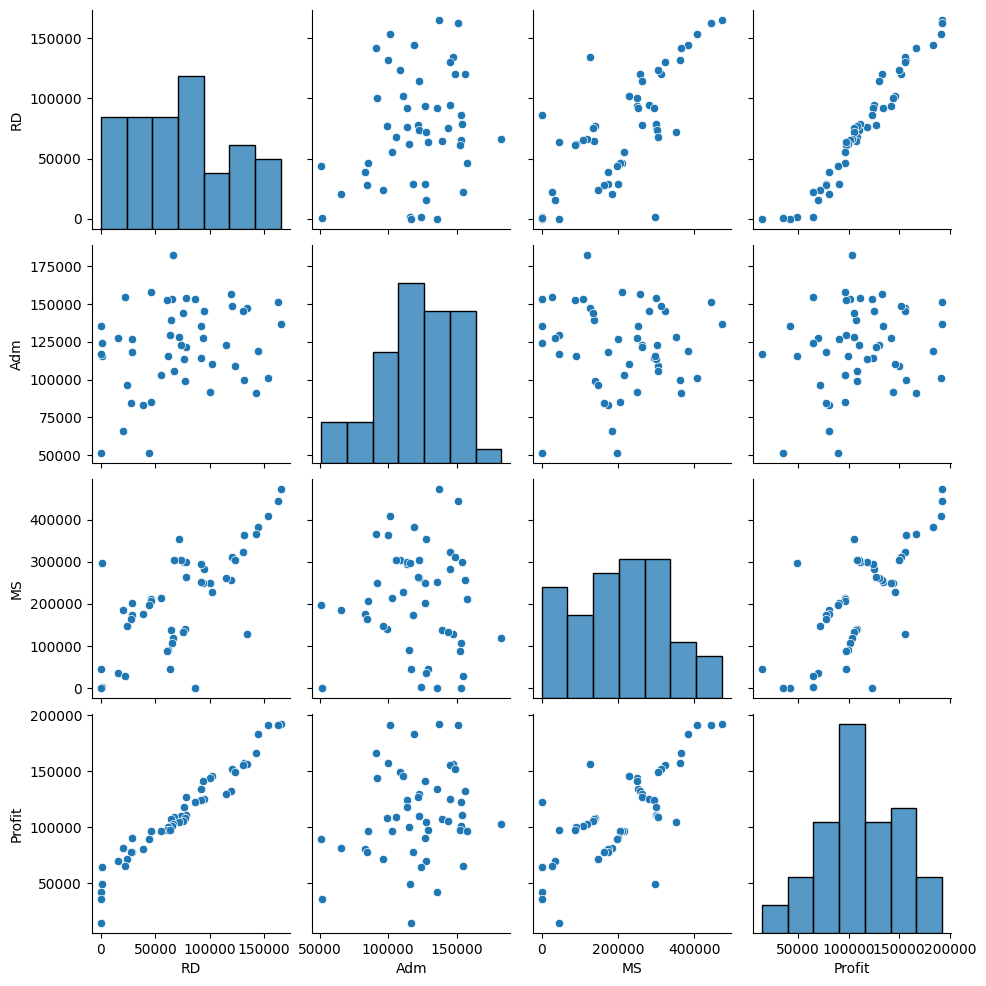

In [18]:
#pairplot
plt.figure(figsize=(10,10))
sns.pairplot(df)

# **Histogram**

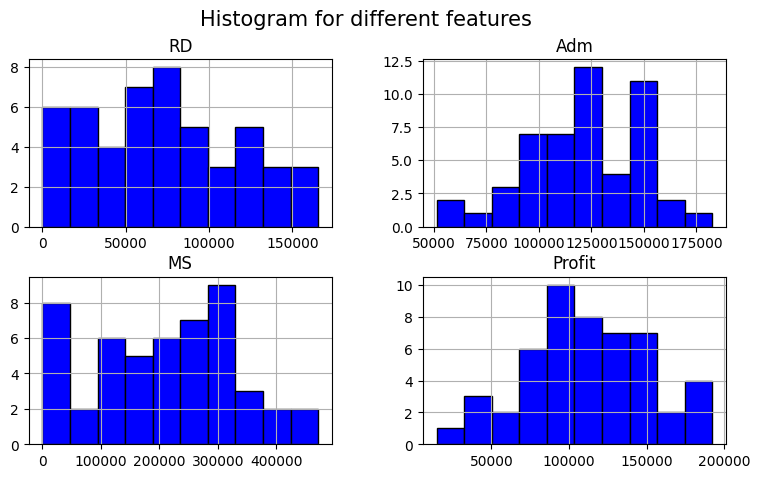

In [19]:
#histogram
df.hist(figsize=(9,5),color='blue',rwidth=1,edgecolor='black')
plt.suptitle('Histogram for different features',ha='center',fontsize=15)
plt.show()

# **Distplot**

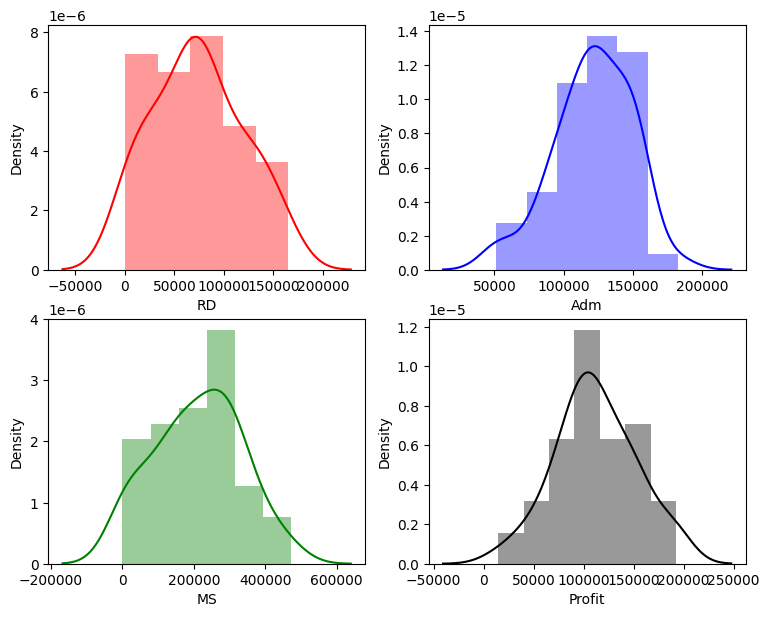

In [20]:
#distplot
plt.figure(figsize=(9,7))
plt.subplot(221)
sns.distplot(df['RD'],color='red')
plt.subplot(222)
sns.distplot(df['Adm'],color='blue')
plt.subplot(223)
sns.distplot(df['MS'],color='green')
plt.subplot(224)
sns.distplot(df['Profit'],color='black')
plt.show()

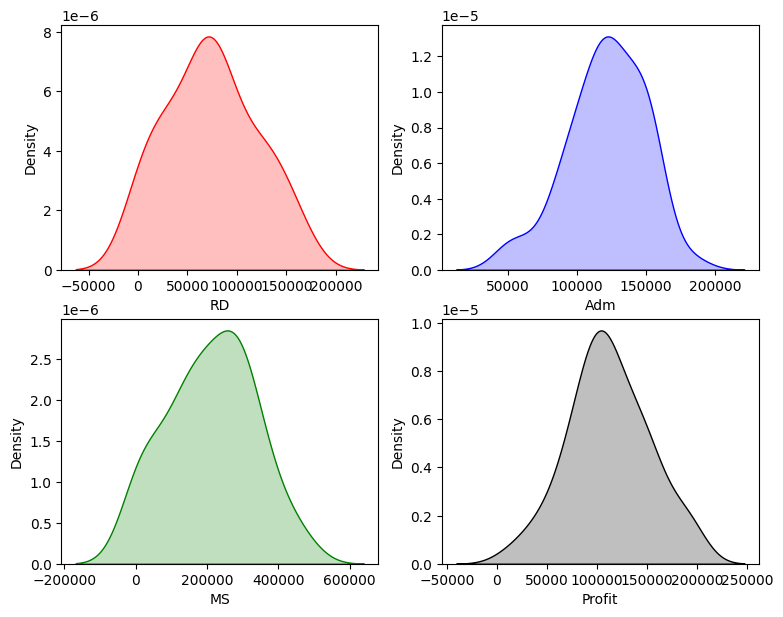

In [21]:
#kdeplot
plt.figure(figsize=(9,7))
plt.subplot(221)
sns.kdeplot(df['RD'],color='red',shade=True)
plt.subplot(222)
sns.kdeplot(df['Adm'],color='blue',shade=True)
plt.subplot(223)
sns.kdeplot(df['MS'],color='green',shade=True)
plt.subplot(224)
sns.kdeplot(df['Profit'],color='black',shade=True)
plt.show()

<Axes: ylabel='Profit'>

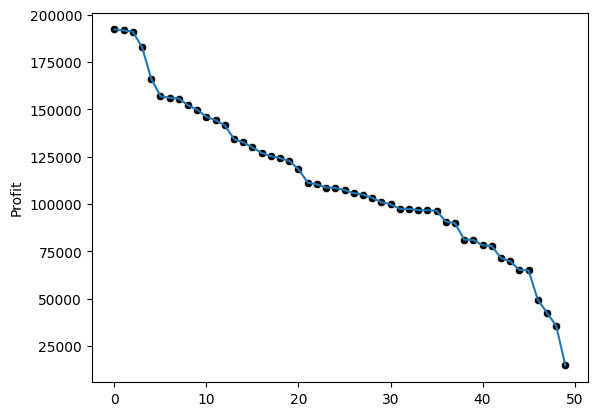

In [22]:
#scatterplot
sns.scatterplot(df['Profit'],color='black')
sns.lineplot(df['Profit'])

# **Boxplot**

<Axes: >

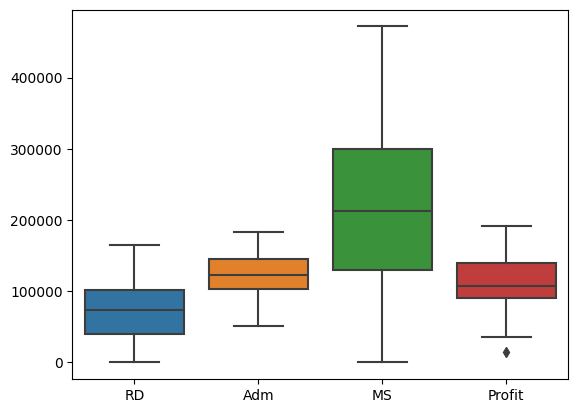

In [23]:
 #boxplot
 sns.boxplot(df)

# **Regression Plot**

<Axes: xlabel='RD', ylabel='Profit'>

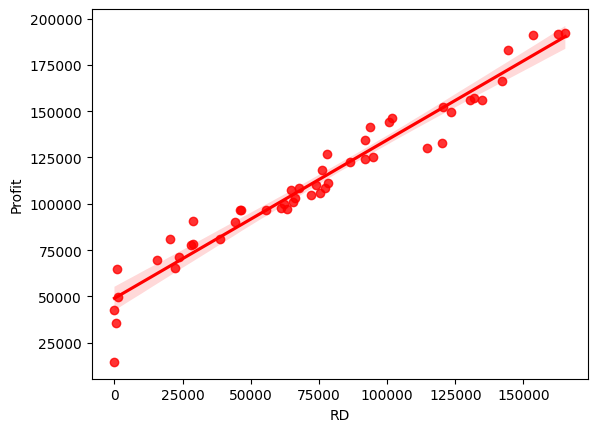

In [24]:
#regression Plot
#for RD and Profit
sns.regplot(x='RD',y='Profit',data=df,color='red')

<Axes: xlabel='Adm', ylabel='Profit'>

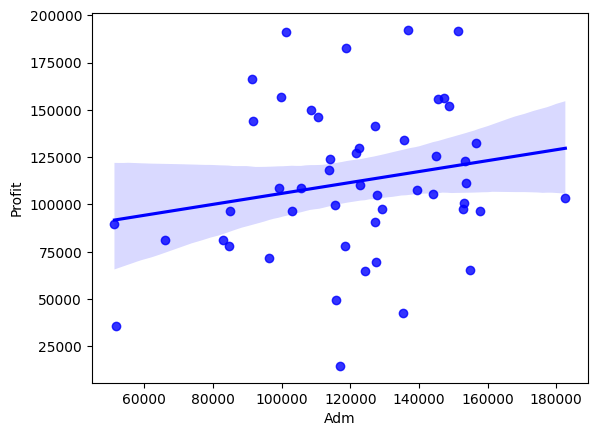

In [25]:
#for Adm and Profit
sns.regplot(x='Adm',y='Profit',data=df,color='blue')

<Axes: xlabel='MS', ylabel='Profit'>

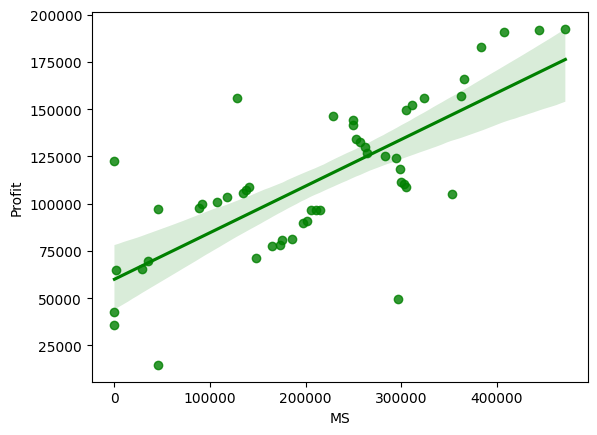

In [26]:
#for MS and Profit
sns.regplot(x='MS',y='Profit',data=df,color='green')

# **Model Building**

In [27]:
#model building
model=smf.ols('Profit~RD+Adm+MS',data=df).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        15:26:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model.params

Intercept    50122.192990
RD               0.805715
Adm             -0.026816
MS               0.027228
dtype: float64

In [30]:
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
RD           17.846374
Adm          -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
Adm          6.017551e-01
MS           1.047168e-01
dtype: float64


In [31]:
print(model.rsquared,'\n',model.rsquared_adj)

0.9507459940683246 
 0.9475337762901719


In [32]:
#slr for administration and marketing spend
#mlr of combination of administration and marketing spend

In [33]:
#slr for administration
model_adm=smf.ols('Profit~Adm',data=df).fit()

In [34]:
print(model_adm.summary())
print(model_adm.tvalues,'\n',model_adm.pvalues)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 14 Jan 2024   Prob (F-statistic):              0.162
Time:                        15:26:05   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.0

In [35]:
#slr for marketing spend
model_ms=smf.ols('Profit~MS',data=df).fit()

In [36]:
print(model_ms.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           4.38e-10
Time:                        15:26:05   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.0

In [37]:
#mlr of combination of administration and marketing spend
admms=smf.ols('Profit~Adm+MS',data=df).fit()

In [38]:
print(admms.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.50e-10
Time:                        15:26:05   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.2

In [39]:
df.columns

Index(['RD', 'Adm', 'MS', 'St', 'Profit'], dtype='object')

# **Model Validation**

In [40]:
#model validation
#checking collinearity by using VIF

# **For RD**

In [41]:
#modl for RD
mod1=smf.ols('RD~Adm+MS',data=df).fit()

In [42]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RD   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     34.52
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           5.97e-10
Time:                        15:26:05   Log-Likelihood:                -584.56
No. Observations:                  50   AIC:                             1175.
Df Residuals:                      47   BIC:                             1181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.711e+04   2.05e+04     -1.807      0.077   -7.84e+04    4199.950
Adm            0.4350      0.152      2.859      0.006       0.129       0.741
MS             0.2751      0.035      7.890      0.000       0.205       0.345
==============================================================================
Omnibus:                        3.767   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.001
Skew:                          -0.311   Prob(JB):                        0.223
Kurtosis:                       4.027   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
rs_rd=mod1.rsquared

In [44]:
vif_rd=1/(1-rs_rd)

In [45]:
vif_rd

2.4689030699947017

# **For Adm**

In [46]:
#mod2 for Adm
mod2=smf.ols('Adm~RD+MS',data=df).fit()

In [47]:
rs_adm=mod2.rsquared

In [48]:
vif_adm=1/(1-rs_adm)

In [49]:
vif_adm

1.1750910070550453

# **For MS**

In [50]:
#mod3 for MS
mod3=smf.ols('MS~RD+Adm',data=df).fit()

In [51]:
rs_ms=mod3.rsquared

In [52]:
vif_ms=1/(1-rs_ms)

In [53]:
vif_ms

2.326773290530878

**dataframe for all VIF**

In [54]:
#putting values in dataframe
m=pd.DataFrame({'Variable':['RD','Adm','MS'],'Values':[vif_rd,vif_adm,vif_ms]})
m

,Variable,Values
0,RD,2.468903
1,Adm,1.175091
2,MS,2.326773


In [55]:
# after testing we get to know that no collinearity is present

In [56]:
# Testing for normality
# Residual test

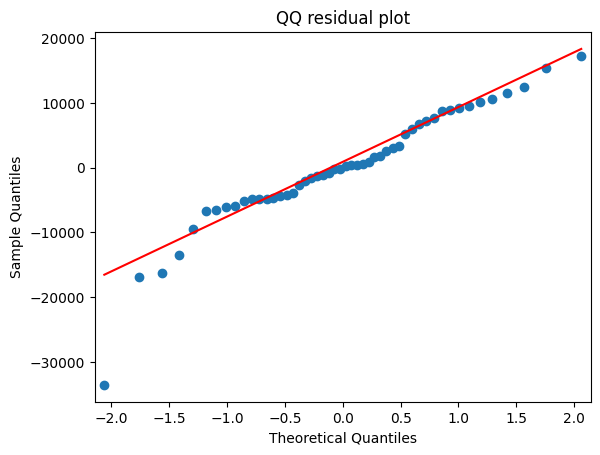

In [57]:
#qqplot
sm.qqplot(model.resid,line='q')
plt.title('QQ residual plot')
plt.show()

<Axes: >

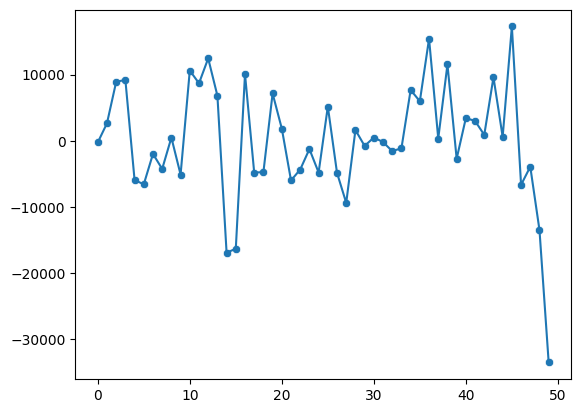

In [58]:
#scatterplot
sns.scatterplot(model.resid)
sns.lineplot(model.resid)

In [59]:
#standardization values
def standardize(v):
  equ=(v-v.mean())/v.std()
  return equ

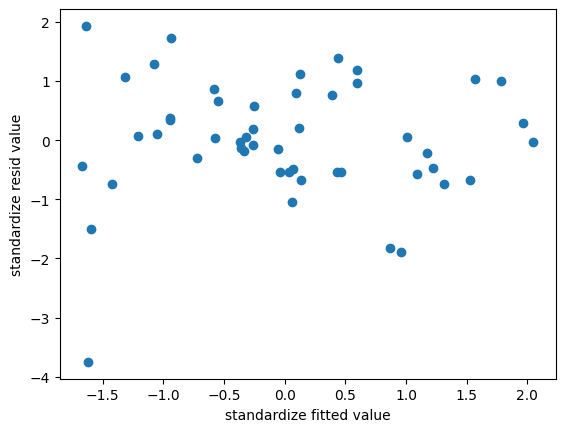

In [60]:
#scatterplot
plt.scatter(x=standardize(model.fittedvalues),y=standardize(model.resid))
plt.xlabel('standardize fitted value')
plt.ylabel('standardize resid value')
plt.show()

In [61]:
#Residuals vs regressors

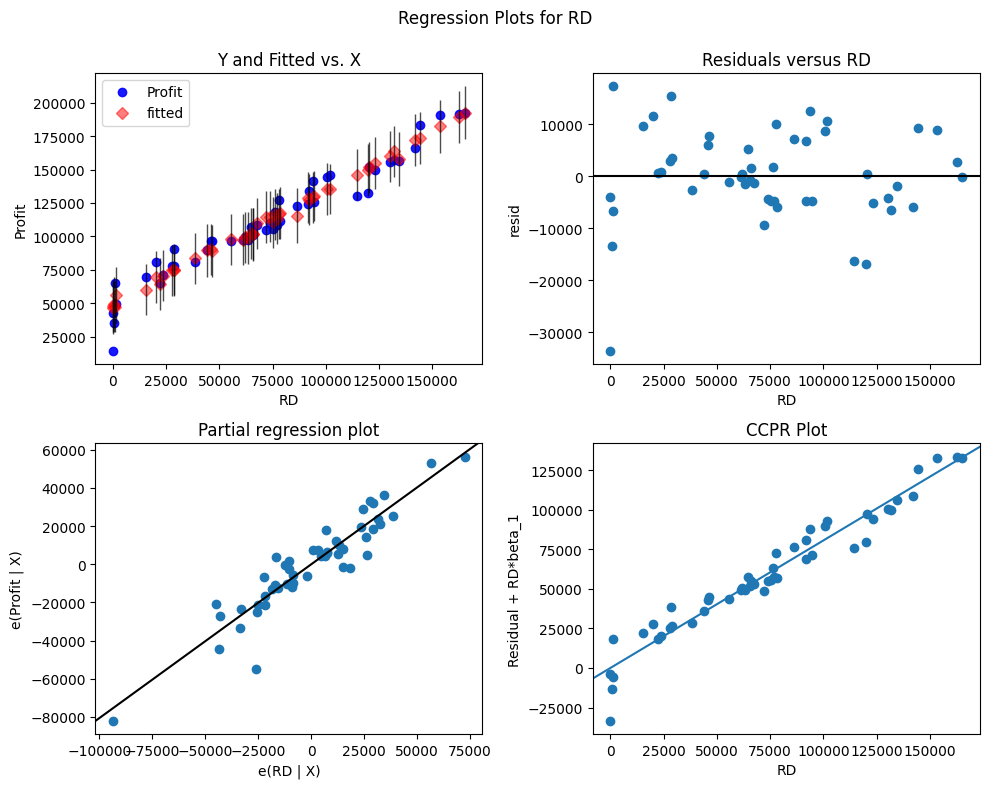

In [62]:
# Plots for RD
fig=plt.figure(figsize=(10,8))
fig=sm.graphics.plot_regress_exog(model,'RD',fig)

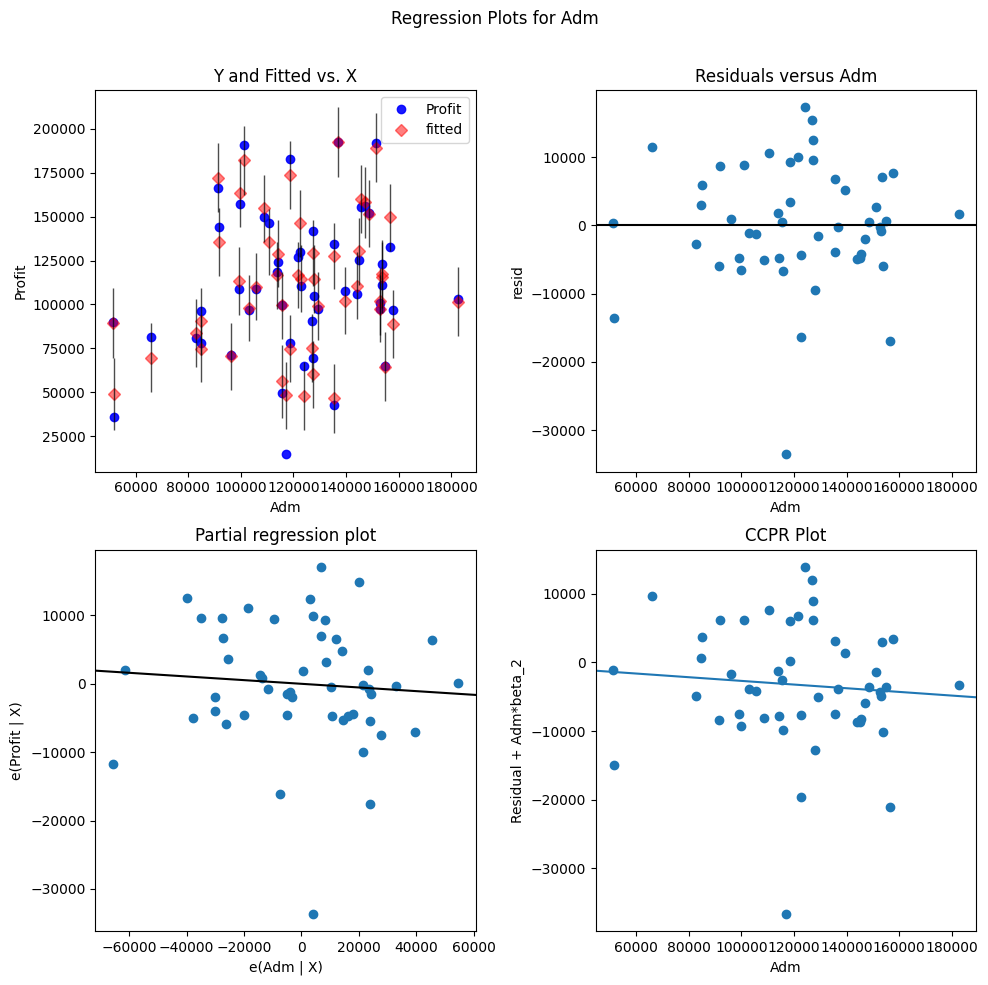

In [63]:
#Plots for Administration
fig=plt.figure(figsize=(10,10))
fig=sm.graphics.plot_regress_exog(model,'Adm',fig)

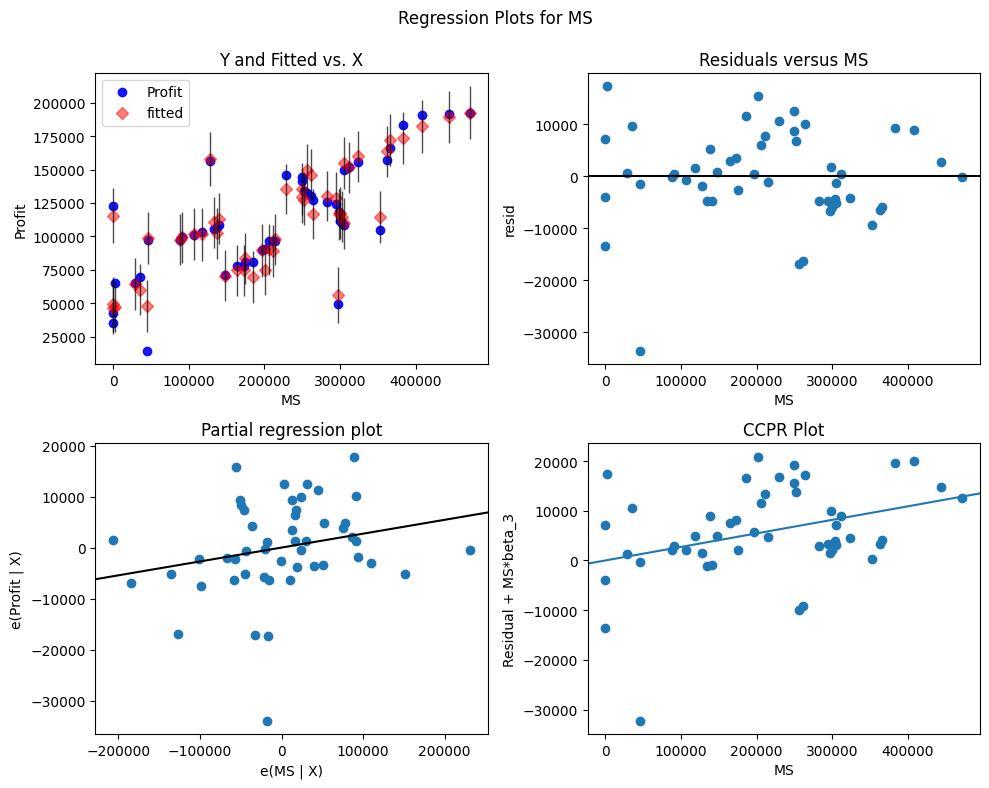

In [64]:
#Plots for Marketing Spend
fig=plt.figure(figsize=(10,8))
fig=sm.graphics.plot_regress_exog(model,'MS',fig)
plt.show()

In [65]:
#detecting outliers

In [66]:
#levarage values

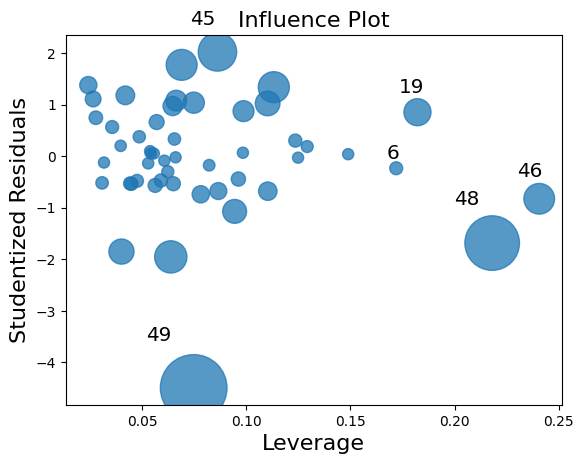

In [67]:
#influence Plot
influence_plot(model)
plt.show()

In [68]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoffs=3*((k+1))/n
leverage_cutoffs

0.36

# **Cook Distance**

In [69]:
#cooks distance
mfv=model.get_influence()
(c,_)=mfv.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

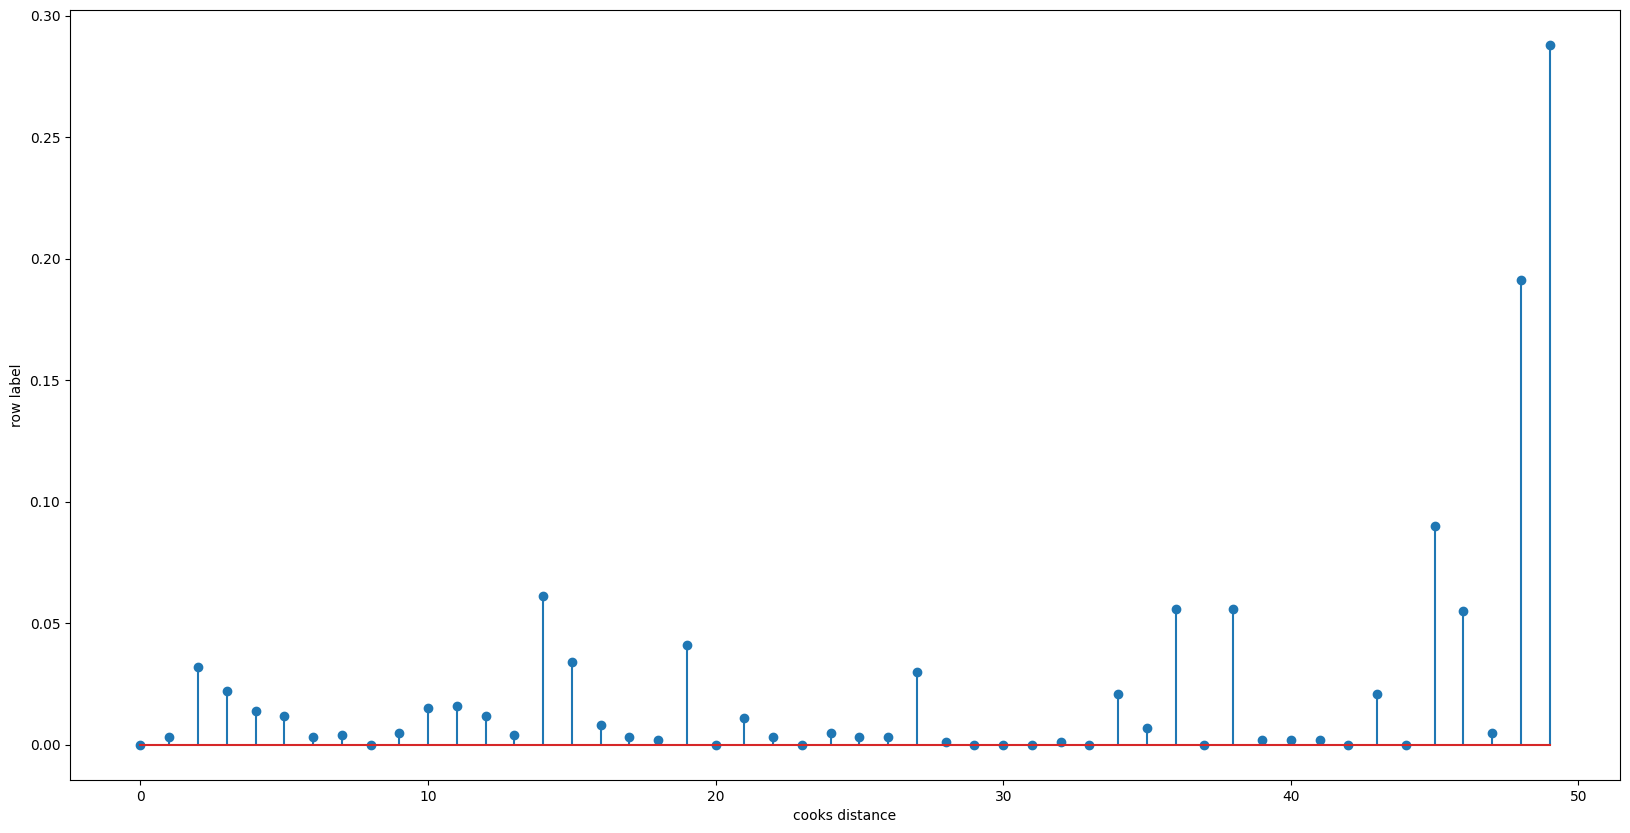

In [70]:
plt.figure(figsize=(20,10))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('cooks distance')
plt.ylabel('row label')
plt.show()

In [71]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [72]:
#drop 49

In [73]:
#after drop
df.tail()

,RD,Adm,MS,St,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [74]:
df1=df

In [75]:
mv2=smf.ols('Profit~RD+Adm+MS',data=df1).fit()

In [76]:
mfv2=mv2.get_influence()
(cv,_)=mfv2.cooks_distance
cv

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<StemContainer object of 3 artists>

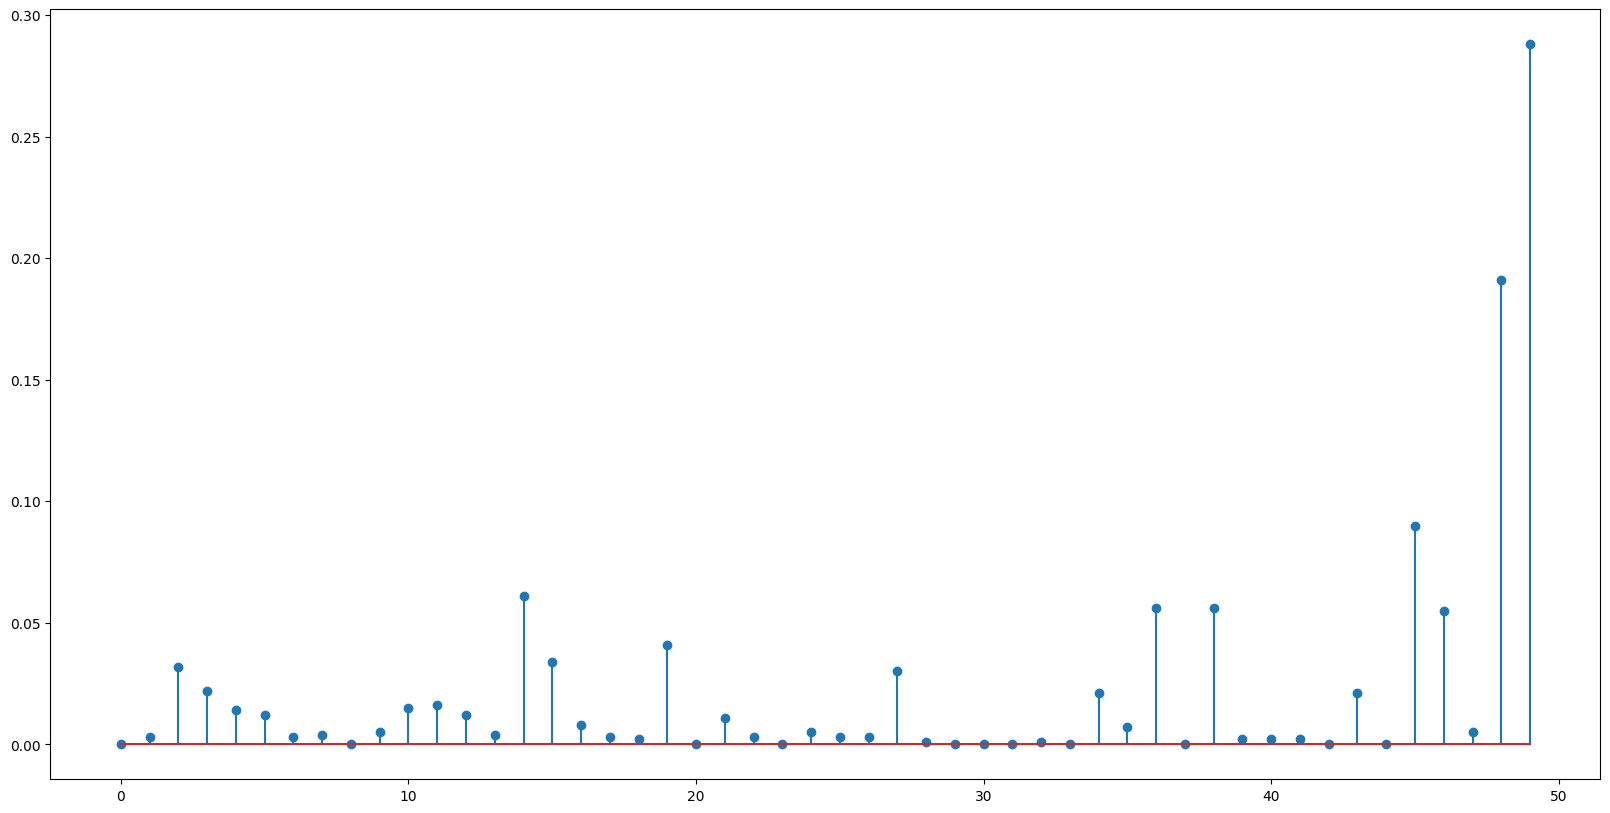

In [77]:
plt.figure(figsize=(20,10))
plt.stem(np.arange(len(df1)),np.round(cv,3))

In [78]:
(np.argmax(cv),np.max(cv))

(49, 0.2880822927543272)

In [79]:
df1

,RD,Adm,MS,St,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [80]:
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoffs=3*((k+1))/n
leverage_cutoffs

0.36

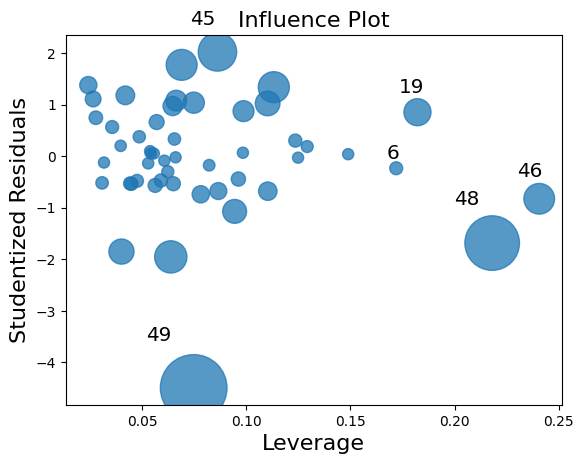

In [81]:
#influence plot
influence_plot(mv2)
plt.show()

**conclusion**

In [82]:
#since cooks distance>1 so we can stop model detection diagnostics

# **Final Model**

In [83]:
#final model
final_model=smf.ols('Profit~RD+Adm+MS',data=df1).fit()

In [84]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        15:26:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
final_model.rsquared

0.9507459940683246

In [86]:
#Accuracy is 0.9507459940683246 i.e 96%

**Accuracy is 96%**

In [87]:
df1.head()

,RD,Adm,MS,St,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [88]:
#model prediction

In [89]:
#new data
new=pd.DataFrame({'RD':140000,'Adm':125000,'MS':400000},index=[1])
new

,RD,Adm,MS
1,140000,125000,400000


In [90]:
#prediction of profit
final_model.predict(new)

1    170461.529849
dtype: float64

In [91]:
pred=final_model.predict(df1)

In [92]:
pred.head()  #predicted value

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

In [93]:
df1['Profit'].head()  # actual value

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [94]:
final_model.resid.head()  #error

0    -259.422890
1    2635.291768
2    8903.110904
3    9205.289974
4   -5951.574183
dtype: float64

**table containing R^2 value for each prepared model**

In [95]:
#table containing R^2 value for each prepared model
table={'pred_model':['Model','Final Model'],'R_square':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(table)
table

,pred_model,R_square
0,Model,0.950746
1,Final Model,0.950746


In [96]:
#completed

# **completed**